In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [98]:
train = pd.read_csv('../../data/train_ship_segmentations_v2.csv')
train.head()

,ImageId,EncodedPixels
0,00003e153.jpg,NaN
1,0001124c7.jpg,NaN
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...


In [99]:
train.shape

(231723, 2)

## Sample images with ships

In [100]:
figure, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))
sample = train[~train.EncodedPixels.isna()].sample(10)

for item in zip(axes.ravel(), sample.ImageId):
    ax, num = item
    img = mpimg.imread('../../data/train_v2/{}'.format(num))
    ax.imshow(img)
    ax.axis('off')

## Show masks

In [ ]:
def apply_mask(image, mask):
    for x, y in mask:
        image[x, y, [0, 1]] = 255
    return image

In [ ]:
sample

,ImageId,EncodedPixels
160409,b11b74564.jpg,15822 6 16590 6 17358 6 18126 6 18894 6 19662 ...
112118,7b967484b.jpg,522055 1 522822 3 523589 5 524355 8 525122 10 ...
154259,aa6dd2874.jpg,295492 1 296259 3 297026 5 297793 7 298560 9 2...
137697,97f231c6b.jpg,347845 13 348613 13 349381 13 350149 13 350917...
26209,1d16139a4.jpg,130784 3 131548 7 132312 12 133076 16 133841 1...
187554,cf3ab9d5d.jpg,248248 1 249015 2 249781 5 250548 5 251315 4 2...
34917,26a8474fe.jpg,479578 1 480345 3 481112 5 481879 7 482646 9 4...
18915,14e145533.jpg,261012 2 261778 4 262544 7 263309 10 264075 11...
150001,a5c3c3df1.jpg,104 5 872 5 1639 5 2407 5 3175 5 3943 5 4710 5...
136593,96c3e7249.jpg,203258 1 204025 4 204793 5 205560 8 206328 9 2...


In [ ]:
def rle_to_pixels(rle_code):
    '''
    Transforms a RLE code string into a list of pixels of a (768, 768) canvas
    '''
    # Divide the rle in a list of pairs of ints rapresenring the (start,lenght)
    rle_code = [int(i) for i in rle_code.split()] 
    
    pixels = [
        #Find the 2d coordinate for the canva using the mod function (%) and the integer division function(//)
        (pixel_position % 768, pixel_position // 768) 
        # I select the start pixel and the lenght of the line
                 for start, length in list(zip(rle_code[0:-1:2], rle_code[1::2])) 
        # I screen all the pixel positions rapresenting (start,end)
                 for pixel_position in range(start, start + length)] 
    return pixels

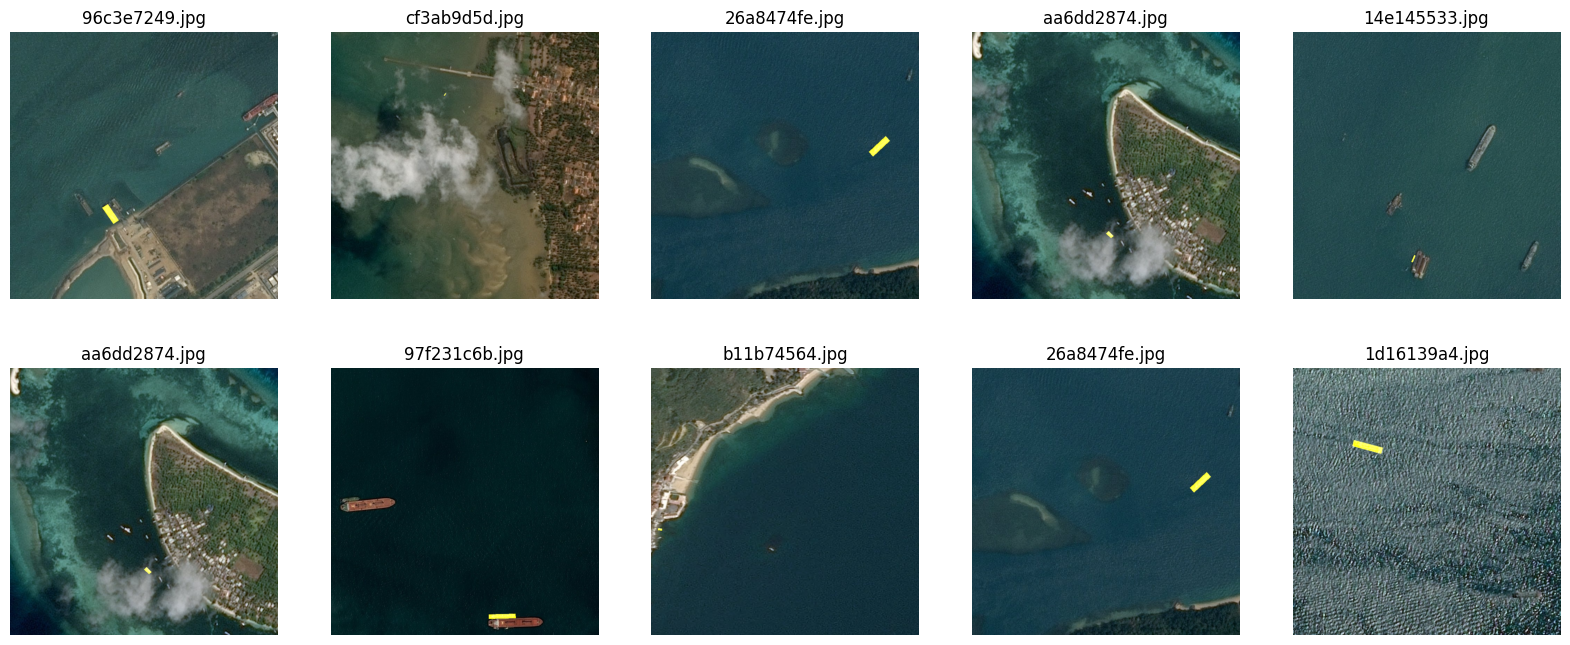

In [ ]:
import PIL

sample = sample.groupby("ImageId")[['EncodedPixels']].agg(lambda rle_codes: ' '.join(rle_codes)).reset_index()
load_img = lambda filename: np.array(PIL.Image.open(f"../../data/train_v2/{filename}"))

_, axes_list = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))

for axes in axes_list:
    for ax in axes:
        ax.axis('off')
        row_index = np.random.randint(len(sample)) # take a random row from the df
        ax.imshow(apply_mask(load_img(sample.loc[row_index, 'ImageId']), rle_to_pixels(sample.loc[row_index, 'EncodedPixels'])))
        ax.set_title(sample.loc[row_index, 'ImageId'])

## Sample images without ships

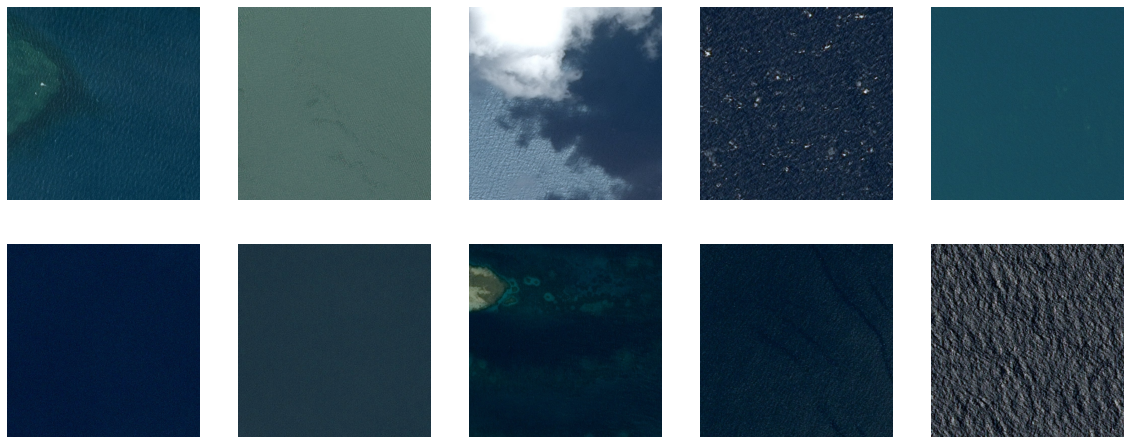

In [ ]:
figure, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))
sample = train[train.EncodedPixels.isna()].sample(10)

for item in zip(axes.ravel(), sample.ImageId):
    ax, num = item
    img = mpimg.imread('../data/train_v2/{}'.format(num))
    ax.imshow(img)
    ax.axis('off')

## Class balance

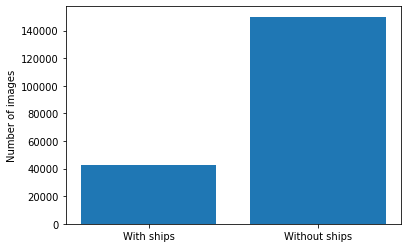

In [ ]:
ships = train[~train.EncodedPixels.isna()].ImageId.unique()
noships = train[train.EncodedPixels.isna()].ImageId.unique()

plt.bar(['With ships', 'Without ships'], [len(ships), len(noships)])
plt.ylabel('Number of images')
plt.show()

## Distribution of objects on images with ships

In [ ]:
ships = train.dropna().groupby('ImageId').count()
ships.describe()

,EncodedPixels
count,42556.000000
mean,1.920364
std,1.906073
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,15.000000


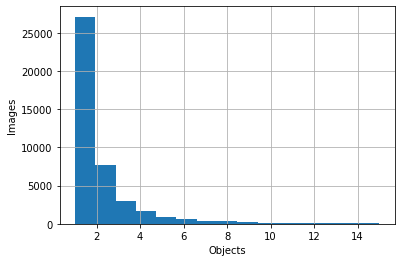

In [ ]:
ships.EncodedPixels.hist(bins=15)
plt.xlabel('Objects')
plt.ylabel('Images')
plt.show()

## Color distribution

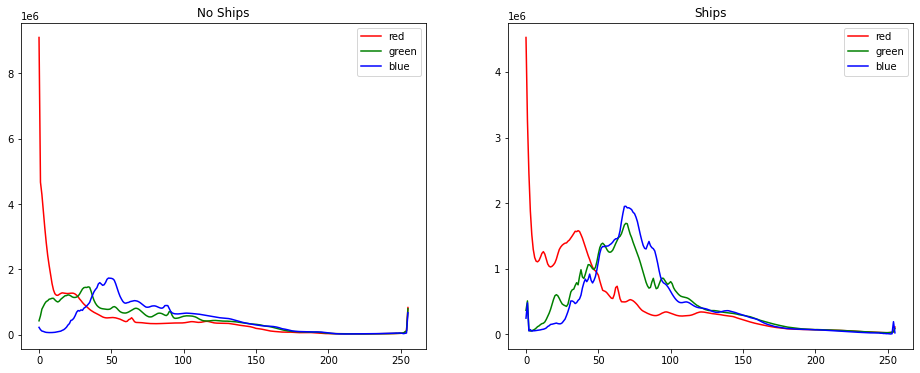

In [ ]:
figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

mask = train.EncodedPixels.isna()
for i, (msk, label) in enumerate(zip([mask, ~mask], ['No Ships', 'Ships'])):
    ids = train[msk].ImageId.sample(200)
    imgs = np.array([mpimg.imread('../data/train_v2/{}'.format(i)) for i in ids])
    
    red = imgs[:, :, :, 0]
    green = imgs[:, :, :, 1]
    blue = imgs[:, :, :, 2]
    
    axes[i].plot(np.bincount(red.ravel()), color='red', label='red')
    axes[i].plot(np.bincount(green.ravel()), color='green', label='green')
    axes[i].plot(np.bincount(blue.ravel()), color='blue', label='blue')
    
    axes[i].legend()
    axes[i].title.set_text(label)